In [1]:
import pandas as pd
import json
import time
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
# Convert json to csv
# with open('comments_all1.json',encoding='utf-8') as jf:
#     datas = json.load(jf)
    
# data_file = open('comments.csv', 'w', encoding='utf-8')
# # create the csv writer object 
# csv_writer = csv.writer(data_file)

# # Counter variable used for writing  
# # headers to the CSV file 
# count = 0
  
# for data in datas: 
#     if count == 0: 
  
#         # Writing headers of CSV file 
#         header = data.keys() 
#         csv_writer.writerow(header) 
#         count += 1
  
#     # Writing data of CSV file 
#     csv_writer.writerow(data.values()) 
  
# data_file.close() 

In [100]:
# read data open file json
import json 
with open('comments_all1.json',encoding='utf-8') as f:
    data_cmts = json.loads(f.read())

In [2]:
data_cmt = pd.read_csv('comments.csv', encoding='utf-8')
data_cmt

,rate,content,link
0,5,"Hình thức đẹp, còn nguyên màng co. Nội dung th...",https://tiki.vn/con-chim-xanh-biec-bay-ve-nguy...
1,5,Với mỗi tác phẩm của chú Nguyễn Nhật Ánh mình ...,https://tiki.vn/con-chim-xanh-biec-bay-ve-nguy...
2,5,Tuổi thơ lớn lên cùng những cuốn truyện của Ng...,https://tiki.vn/con-chim-xanh-biec-bay-ve-nguy...
3,5,Truyện này của NNA khác hẳn với những truyện k...,https://tiki.vn/con-chim-xanh-biec-bay-ve-nguy...
4,3,"Truyện viết nhẹ nhàng, dí dỏm. Ngôn ngữ trong ...",https://tiki.vn/con-chim-xanh-biec-bay-ve-nguy...
...,...,...,...
47055,5,yêu lắm cơ huhu trúng Taehyung bias của tui nè...,https://tiki.vn/bts-comic-tap-2-p46825650.html
47056,5,"Em nhận được rồi ạ . Hàng rất OK, không có dấu...",https://tiki.vn/bts-comic-tap-2-p46825650.html
47057,1,Đặt bản đặc biệt giao bản thường CSKH bảo số l...,https://tiki.vn/bts-comic-tap-2-p46825650.html
47058,5,"Sách rất mới đẹp và dày, giá mềm. Sách được đó...",https://tiki.vn/don-quixote-p416390.html


## Thống kê bình luận theo số lượng rate

In [102]:
rates = np.array(data_cmt['rate'], dtype='int64')
rate_xlabel = [i for i in range(1,6)]
print(rate_xlabel)
rate_data = []
for i in range(1,6):
    rate_data.append(np.count_nonzero( rates == i))

[1, 2, 3, 4, 5]


In [103]:
rate_data

[2032, 1487, 3085, 6776, 33680]

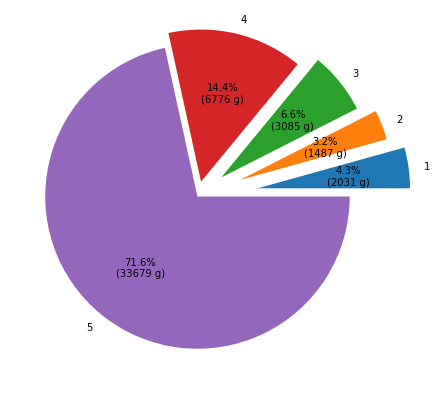

In [104]:
explode = (0.4, 0.3, 0.2, 0.1, 0.0)

# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 

fig = plt.figure(figsize =(10, 7)) 
plt.pie(rate_data,
        autopct = lambda pct: func(pct, rate_data), 
        explode = explode,
        labels = rate_xlabel) 
plt.show()

### Đánh giá
**4,3%** đánh giá 1 sao, 
**3,2%** đánh giá 2 sao,
**6,6%** đánh giá 3 sao,
**14,4%** đánh giá 4 sao,
**71,6%** đánh giá 5 sao 

## Đánh giá sản phẩm (tốt, không tốt, trung bình) 

In [18]:
links = data_cmt['link']
i = 0
list_books = []
list_books.append(links[i])

while i < 47059:
    if links[i] == links[i+1]:
        i += 1
    else:
        list_books.append(links[i+1])
        i +=1
print(len(list_books))    

5195


In [85]:
def countmaxcmt(rate):
    good_cmt = rate.count(5) + rate.count(4) 
    tb_cmt = rate.count(3)
    bad_cmt = rate.count(1) + rate.count(2)
    tg = [good_cmt, tb_cmt, bad_cmt ]
    if max(tg) == good_cmt:
        return 1
    elif max(tg) == tb_cmt: 
        return 2
    else:
        return 0
        

In [86]:
rate_cmt = []
list_item = []
i = 0 
for index,item in enumerate(data_cmts):
   if item['link'] == list_books[i]:
        rate_cmt.append(item['rate'])
   elif (i < 5195):
        r = countmaxcmt(rate_cmt)
        list_item.append(r)
        rate_cmt = []
        i += 1
        rate_cmt.append(item['rate'])
#    elif i == 5195:
#         rate_cmt.append(item['rate'])
#    elif index == len(data_cmts):
#         rate_cmt.append(item['rate'])
#         r = countmaxcmt(rate_cmt)
#         list_item.append(r)
        

In [105]:
rate_items = np.array(list_item, dtype='int64')
rate_item_xlabel = ['Không tốt', 'Tốt', 'Trung Bình']
rate_item_data = []
for i in range(0,3):
    rate_item_data.append(np.count_nonzero( rate_items == i))

In [107]:
rate_item_data

[49, 5132, 13]

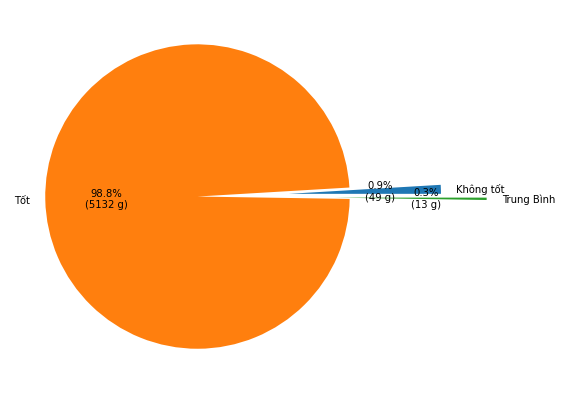

In [106]:
explode = (0.6,0.0, 0.9)

# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 

fig = plt.figure(figsize =(10, 7)) 
plt.pie(rate_item_data,
        autopct = lambda pct: func(pct, rate_item_data), 
        explode = explode,
        labels = rate_item_xlabel) 
plt.show()

### Đánh giá kết quả
**98,8%** sản phẩm được đánh giá tốt,
**0,9%** sản phẩm được đánh giá không tốt,
**0,3%** sản phẩm được đánh giá trung bình

## Đánh giá sản phẩm theo số rate lớn nhất

In [89]:
def countmaxratecmt(rate):
    cmt_5 = rate.count(5)
    cmt_4 = rate.count(4)
    cmt_3 = rate.count(3)
    cmt_2 = rate.count(2)
    cmt_1 = rate.count(1)
    tg = [cmt_5, cmt_4, cmt_3, cmt_2, cmt_1 ]
    if max(tg) == cmt_5:
        return 5
    elif max(tg) == cmt_4: 
        return 4
    elif max(tg) == cmt_3: 
        return 3
    elif max(tg) == cmt_2: 
        return 2
    else:
        return 1
        

In [79]:
rate_cmt = []
list_item_rate = []
i = 0 
for index,item in enumerate(data_cmts):
   if item['link'] == list_books[i]:
        rate_cmt.append(item['rate'])
   elif (i < 5195):
        r = countmaxratecmt(rate_cmt)
        list_item_rate.append(r)
        rate_cmt = []
        i += 1
        rate_cmt.append(item['rate'])

In [90]:
rate_c = np.array(list_item_rate, dtype='int64')
rate_c_xlabel = [i for i in range(1,6)]
rate_c_data = []
for i in range(1,6):
    rate_c_data.append(np.count_nonzero( rate_c == i))

In [91]:
rate_c_data

[30, 8, 34, 128, 4994]

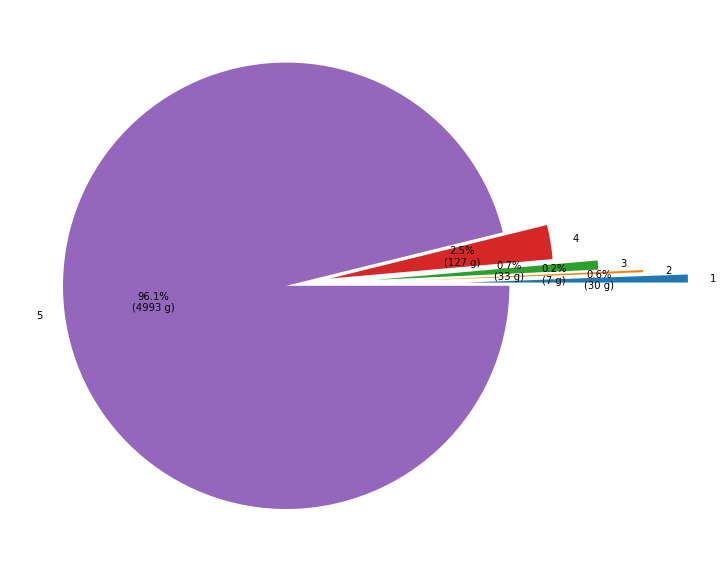

In [99]:
explode = (0.8, 0.6, 0.4, 0.2, 0.0)

# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 

fig = plt.figure(figsize =(10, 11)) 
plt.pie(rate_c_data,
        autopct = lambda pct: func(pct, rate_c_data), 
        explode = explode,
        labels = rate_c_xlabel) 
plt.show()

### Đánh giá 
**0,6%** đánh giá 1 sao, 
**0,2%** đánh giá 2 sao,
**0,7%** đánh giá 3 sao,
**2,5%** đánh giá 4 sao,
**96,1%** đánh giá 5 sao 